In [1]:
from tensorflow import keras

In [28]:
model = keras.models.load_model('best-cnn-model.h5')

In [3]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [4]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


### 첫번째 층의 가중치 알아보기
+ 첫번째 원소는 가중치, 두번째 원소는 절편
+ 커널 크기를 (3,3)으로 지정하고, 깊이는 1, 채널은 32로 지정했으므로 (3, 3, 1, 32)
+ 절편은 각 채널마다 존재하므로 (32,)

In [5]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.026693314 0.24920452


In [7]:
conv_weights.shape

(3, 3, 1, 32)

In [6]:
import matplotlib.pyplot as plt

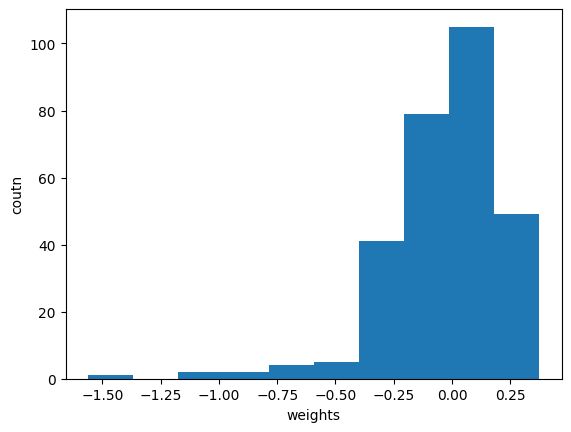

In [8]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel("weights")
plt.ylabel("coutn")
plt.show()

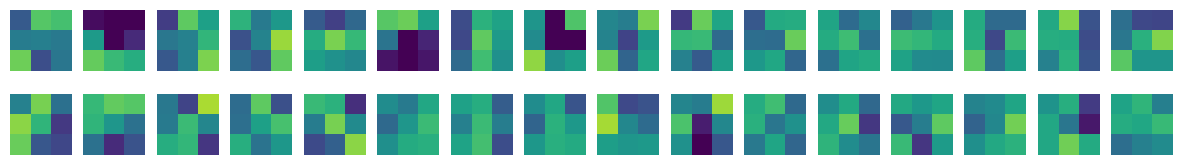

In [10]:
fig, axs = plt.subplots(2, 16, figsize = (15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
        axs[i, j].axis('off')
plt.show()

In [11]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

c:\Users\cw3714\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [14]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0014625234 0.083180405


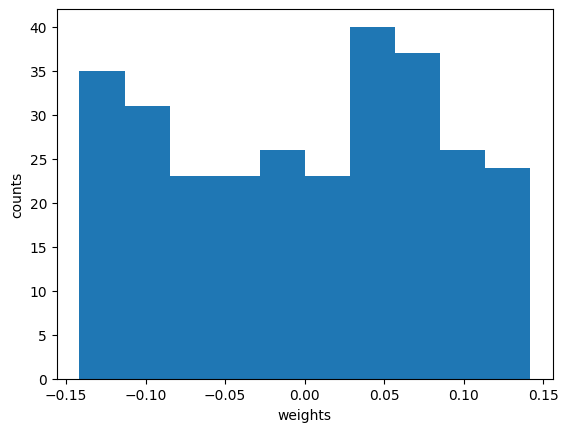

In [15]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel("weights")
plt.ylabel("counts")
plt.show()

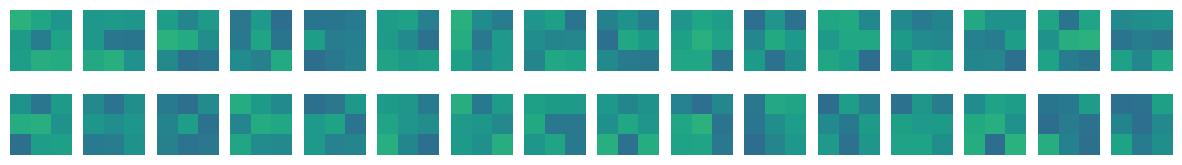

In [18]:
fig, axs = plt.subplots(2, 16, figsize = (15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
        axs[i, j].axis('off')
plt.show()

In [30]:
dense1 = keras.layers.Dense(100, activation = 'sigmoid')
dense2 = keras.layers.Dense(10, activation = 'softmax')

In [33]:
model = keras.models.load_model('best-cnn-model.h5')

In [38]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=input_layer>]


In [40]:
conv_acti = keras.Model(model.inputs, model.layers[0].output)

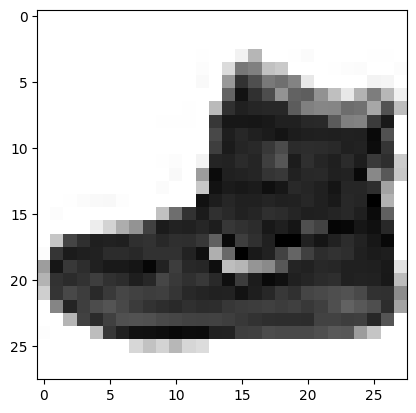

In [41]:
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap = 'gray_r')
plt.show()

In [51]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
(1, 28, 28, 32)


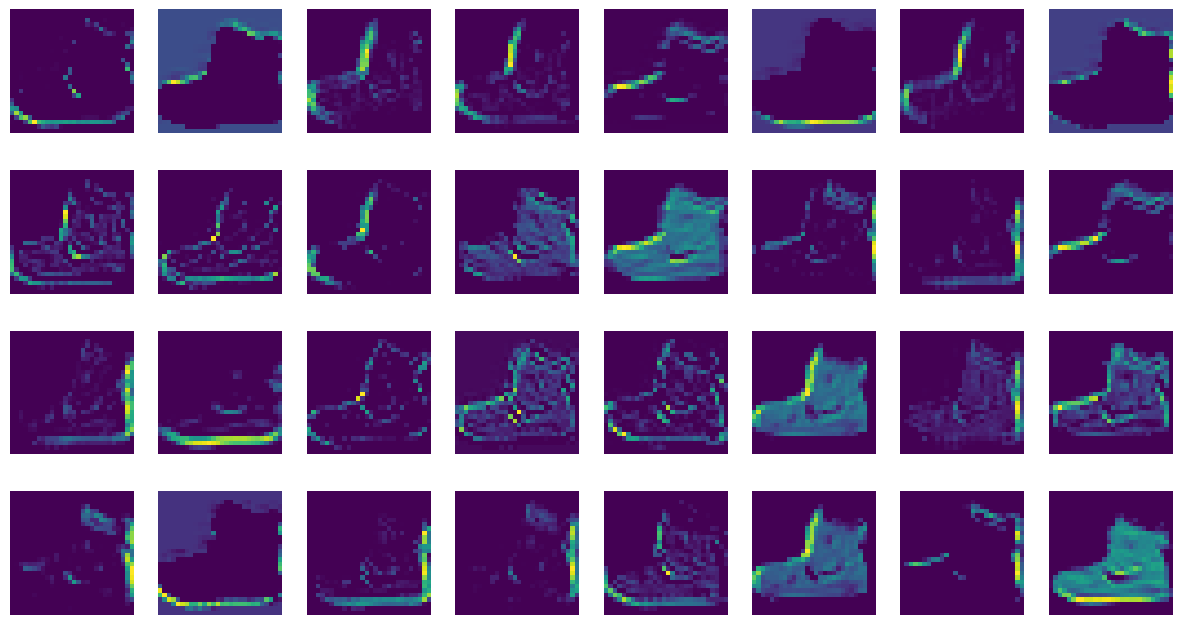

In [52]:
fig, axs = plt.subplots(4, 8, figsize = (15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
        axs[i, j].axis('off')
plt.show()

In [53]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

In [54]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


In [56]:
print(feature_maps.shape)

(1, 14, 14, 64)


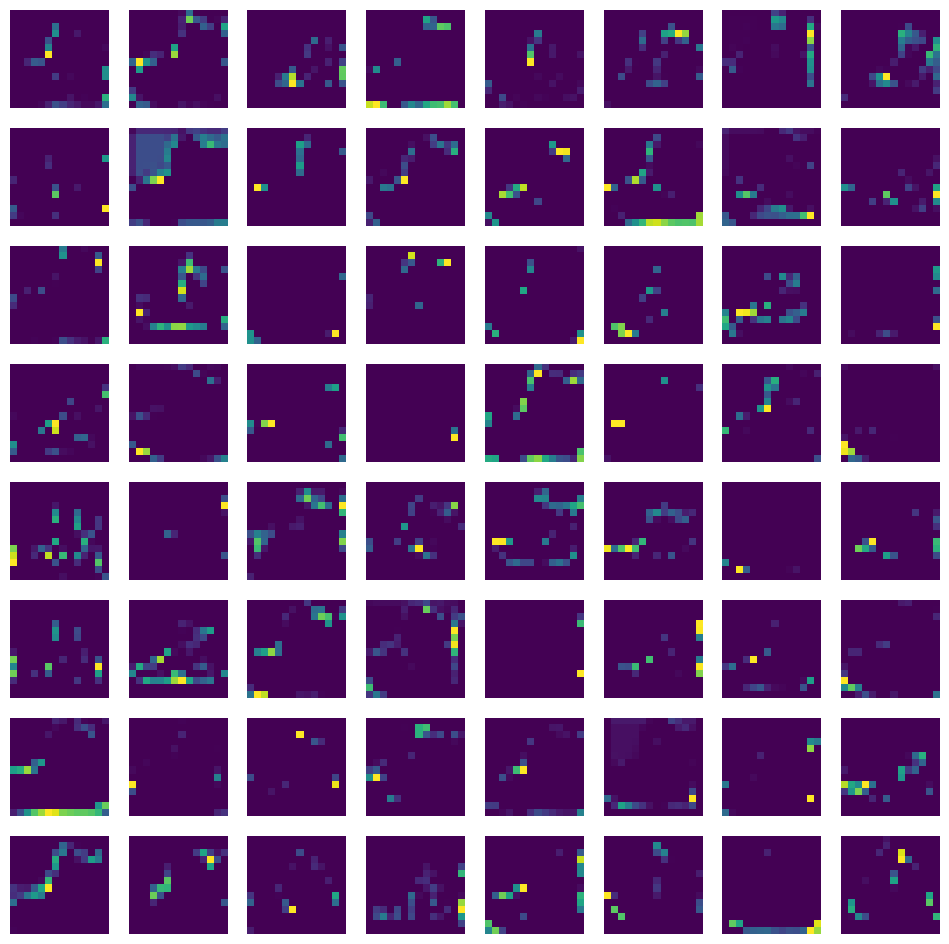

In [57]:
fig, axs = plt.subplots(8, 8, figsize = (12, 12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
        axs[i, j].axis('off')
plt.show()